In [ ]:
import tensorflow as tf
import numpy as np
import tensorflow_hub as tf_hub

print('TF Version:', tf.__version__)
print('TF HUB Version:', tf_hub.__version__)

TF Version: 2.3.0
TF HUB Version: 0.9.0


In [ ]:
base_vgg = tf.keras.applications.VGG16(include_top=False, 
                                       weights='imagenet', 
                                       input_shape=(128, 128, 3))
base_vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [ ]:
base_vgg.trainable = False
base_vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [ ]:
for layer in base_vgg.layers:
    print(layer.name, '->', layer.trainable)

input_2 -> False
block1_conv1 -> False
block1_conv2 -> False
block1_pool -> False
block2_conv1 -> False
block2_conv2 -> False
block2_pool -> False
block3_conv1 -> False
block3_conv2 -> False
block3_conv3 -> False
block3_pool -> False
block4_conv1 -> False
block4_conv2 -> False
block4_conv3 -> False
block4_pool -> False
block5_conv1 -> False
block5_conv2 -> False
block5_conv3 -> False
block5_pool -> False


In [ ]:
inputs = tf.keras.Input(shape=(128, 128, 3))
x = base_vgg(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

fr_vgg16 = tf.keras.Model(inputs, outputs)
fr_vgg16.summary()

Model: "functional_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_6 ( (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 513       
Total params: 14,977,857
Trainable params: 263,169
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
for layer in fr_vgg16.layers:
    print(layer.name, '->', layer.trainable)

input_4 -> True
vgg16 -> False
global_average_pooling2d_6 -> True
dense_11 -> True
dense_12 -> True


In [ ]:
base_vgg.trainable = True
fine_tune_from = 11
for layer in base_vgg.layers[:fine_tune_from]:
    layer.trainable = False

base_vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [ ]:
layer_status = np.array([layer.trainable 
                             for layer in base_vgg.layers])
print('Total Non-trainable Layers:', sum(~layer_status))
print('Total Trainable Layers:', sum(layer_status))

for layer in base_vgg.layers:
    print(layer.name, '->', layer.trainable)

Total Non-trainable Layers: 11
Total Trainable Layers: 8
input_2 -> False
block1_conv1 -> False
block1_conv2 -> False
block1_pool -> False
block2_conv1 -> False
block2_conv2 -> False
block2_pool -> False
block3_conv1 -> False
block3_conv2 -> False
block3_conv3 -> False
block3_pool -> False
block4_conv1 -> True
block4_conv2 -> True
block4_conv3 -> True
block4_pool -> True
block5_conv1 -> True
block5_conv2 -> True
block5_conv3 -> True
block5_pool -> True


In [ ]:
base_vgg.trainable = True
base_vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [ ]:
layer_status = np.array([layer.trainable 
                             for layer in base_vgg.layers])
print('Total Non-trainable Layers:', sum(~layer_status))
print('Total Trainable Layers:', sum(layer_status))

for layer in base_vgg.layers:
    print(layer.name, '->', layer.trainable)

Total Non-trainable Layers: 0
Total Trainable Layers: 19
input_2 -> True
block1_conv1 -> True
block1_conv2 -> True
block1_pool -> True
block2_conv1 -> True
block2_conv2 -> True
block2_pool -> True
block3_conv1 -> True
block3_conv2 -> True
block3_conv3 -> True
block3_pool -> True
block4_conv1 -> True
block4_conv2 -> True
block4_conv3 -> True
block4_pool -> True
block5_conv1 -> True
block5_conv2 -> True
block5_conv3 -> True
block5_pool -> True


In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

cat = Image.open('./cat.png').convert("RGB")
cat_arr = np.array(cat)
cat_arr, cat_arr.shape

(array([[[127, 136, 133],
         [127, 136, 133],
         [127, 136, 133],
         ...,
         [162, 178, 175],
         [162, 177, 174],
         [161, 176, 173]],
 
        [[126, 136, 130],
         [125, 136, 131],
         [125, 136, 131],
         ...,
         [162, 177, 174],
         [162, 177, 174],
         [161, 177, 173]],
 
        [[128, 138, 132],
         [128, 138, 132],
         [128, 138, 132],
         ...,
         [163, 178, 175],
         [164, 179, 176],
         [163, 178, 175]],
 
        ...,
 
        [[ 54,  38,  42],
         [ 54,  38,  41],
         [ 55,  40,  43],
         ...,
         [186, 162, 178],
         [193, 172, 187],
         [200, 180, 195]],
 
        [[ 55,  40,  43],
         [ 55,  39,  42],
         [ 56,  41,  44],
         ...,
         [189, 166, 180],
         [189, 165, 181],
         [190, 167, 183]],
 
        [[ 56,  41,  44],
         [ 55,  40,  43],
         [ 54,  39,  43],
         ...,
         [194, 176, 186],
  

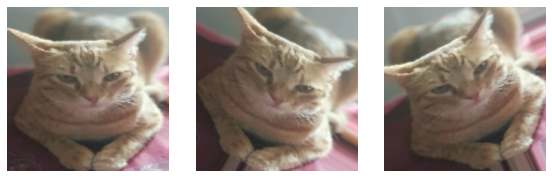

In [ ]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
                rescale=1./255, rotation_range=30,
                horizontal_flip=True)
aug_images = [datagen.random_transform(cat_arr) 
                    for i in range(3)]

plt.figure(figsize=(8, 5))
for i in range(3):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(aug_images[i])
    plt.axis("off")
plt.tight_layout()

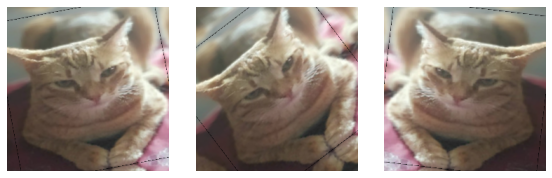

In [ ]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.experimental.preprocessing.\
            Rescaling(scale=1./255),
        tf.keras.layers.experimental.preprocessing.\
            RandomFlip("horizontal"),
        tf.keras.layers.experimental.preprocessing.\
            RandomRotation(0.3, fill_mode='reflect'),
    ]
)

aug_images = [data_augmentation(np.array([cat_arr]))[0] 
                  for i in range(3)]

plt.figure(figsize=(8, 5))
for i in range(3):
    ax = plt.subplot(2, 3, i + 1)
    plt.imshow(aug_images[i])
    plt.axis("off")
plt.tight_layout()                  

In [ ]:
data_augmentation

In [ ]:
base_resnet = tf.keras.applications.ResNet50(include_top=False, 
                                        weights='imagenet', 
                                        input_shape=(128, 128, 3))
base_resnet.trainable = True
inputs = tf.keras.Input(shape=(128, 128, 3))
x = base_resnet(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

ft_resnet = tf.keras.Model(inputs, outputs)

In [ ]:
def lr_function(epochs, steps, boundaries, 
                        lr_decay_factor, start_lr):
    lrs = []
    for epoch in range(epochs):
        if epoch*steps in boundaries:
            idx = boundaries.index(epoch*steps)
            lr = lr_decay_factor[idx]
            lrs.append(lr)
            start_lr = lr
        else:
            lrs.append(start_lr)

    return lrs

train_data_size = 3200
batch_size = 32
steps = train_data_size // batch_size
lr = 0.001
boundaries = [5*steps, 9*steps, 12*steps]
lr_decay_factor = [0.1*lr, 0.01*lr, 0.001*lr]
epochs = 15
lr_values = lr_function(epochs=epochs, steps=steps, 
                        boundaries=boundaries, 
                        lr_decay_factor=lr_decay_factor, 
                        start_lr=lr)

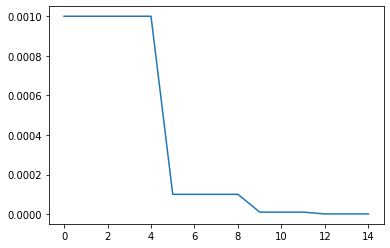

In [ ]:
plt.plot(range(epochs), lr_values);